<a href="https://colab.research.google.com/github/TamTran72111/learn-ml-dl/blob/master/Augelien_Geron_book/05_Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='red'><b><h3>Linear SVM Classification</b></h3></font>

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC # Can use SVC class with a linear kernel instead

iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]    # petal length, petal width
y = (iris['target'] == 2).astype(np.float64)    # Iris virginica

svm_clf = Pipeline([
  ('scaler', StandardScaler()),
  ('linear_svc', LinearSVC(C=1, loss='hinge')),
])

svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [3]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [0]:
# SGDClassifier(loss='hinge', alpha=1/(m*C)) uses Stochastic Gradient Descent
# to train a linear SVM classifier. Not fast as LinearSVC, but be useful to 
# handle online classification tasks or huge datasets that do not fit in memory

<font color='red'><b><h3>Nonlinear SVM Classification</b></h3></font>

In [0]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

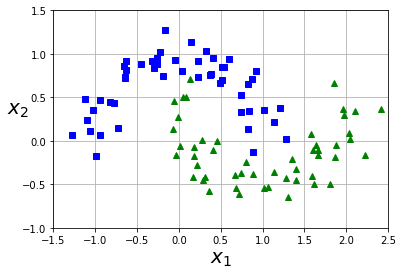

In [6]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
  plt.plot(X[:, 0][y==0], X[:,1][y==0], 'bs')
  plt.plot(X[:, 0][y==1], X[:,1][y==1], 'g^')
  plt.axis(axes)
  plt.grid(True, which='both')
  plt.xlabel(r'$x_1$', fontsize=20)
  plt.ylabel(r'$x_2$', fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [7]:
polynomial_svm_clf = Pipeline([
  ('poly_features', PolynomialFeatures(degree=3)),
  ('scaler', StandardScaler()),
  ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42)),
])

polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

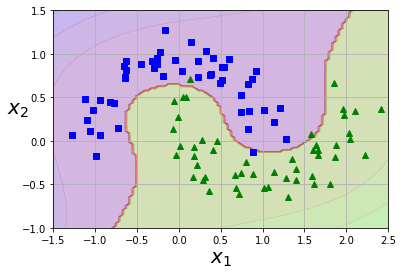

In [8]:
def plot_predictions(clf, axes):
  x0s = np.linspace(axes[0], axes[1], 100)
  x1s = np.linspace(axes[2], axes[3], 100)
  x0, x1 = np.meshgrid(x0s, x1s)
  X = np.c_[x0.ravel(), x1.ravel()]
  y_pred = clf.predict(X).reshape(x0.shape)
  y_decision = clf.decision_function(X).reshape(x0.shape)
  plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
  plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

**Polynomial Kernel**

In [9]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
  ('scaler', StandardScaler()),
  ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

**Gaussian RBF Kernel**

In [10]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001)),
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

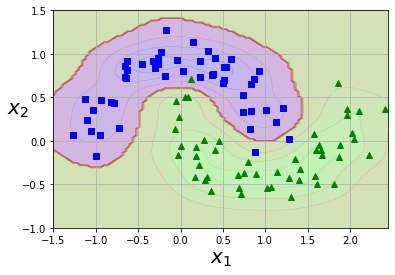

In [11]:
plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y , [-1.5, 2.45, -1, 1.5])
plt.show()

<font color='red'><b><h3>SVM Regression</h3></b></font>

In [0]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [13]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)

In [0]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
  y_pred = svm_reg.predict(X)
  off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon) 
  return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

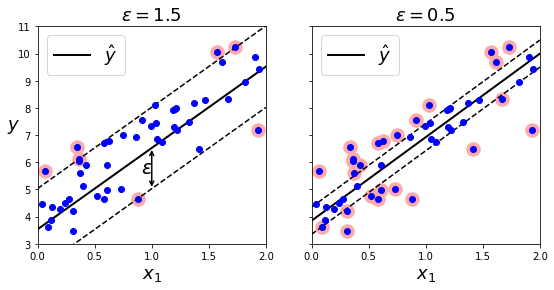

In [15]:
def plot_svm_regression(svm_reg, X, y, axes):
  x1s = np.linspace(axes[0], axes[1], 100). reshape(100, 1)
  y_pred = svm_reg.predict(x1s)
  plt.plot(x1s, y_pred, 'k-', linewidth=2, label=r'$\hat{y}$')
  plt.plot(x1s, y_pred + svm_reg.epsilon, 'k--')
  plt.plot(x1s, y_pred - svm_reg.epsilon, 'k--')
  plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
  plt.plot(X, y, 'bo')
  plt.xlabel(r'$x_1$', fontsize=18)
  plt.legend(loc='upper left', fontsize=18)
  plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9,4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r'$\epsilon = {}$'.format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r'$y$', fontsize=18, rotation=0)

plt.annotate('', xy=(eps_x1, eps_y_pred), xycoords='data',
             xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon), 
             textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
             )
plt.text(0.91, 5.6, r'$\epsilon$', fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r'$\epsilon = {}$'.format(svm_reg2.epsilon), fontsize=18)
plt.show()


In [16]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel='poly', degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

<font color='red'><b><h3>Exercise</h3></b></font>

In [0]:
# Question 8
from sklearn import datasets

iris = datasets.load_iris()
X = iris['data'][:, (2,3)]    # petal length, petal width
y = iris['target']

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [18]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss='hinge', C=C, random_state=42)
svm_clf = SVC(kernel='linear', C=C)
sgd_clf = SGDClassifier(loss='hinge', learning_rate='constant', eta0=0.001,
                        alpha=alpha, max_iter=1000, tol=1e-3, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print('Linear SVC:                  ', lin_clf.intercept_, lin_clf.coef_)
print('SVC:                         ', svm_clf.intercept_, svm_clf.coef_)
print('SGDClassifier(alpha={:.5f}): '.format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

Linear SVC:                   [0.28474272] [[1.05364736 1.09903308]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200):  [0.117] [[0.77714169 0.72981762]]


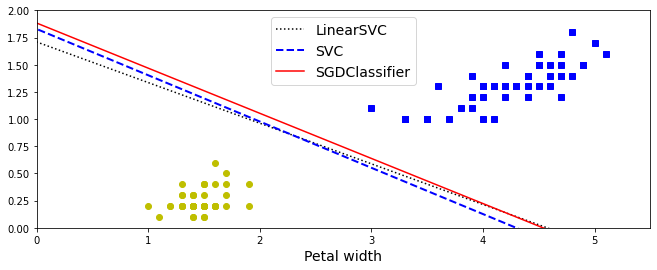

In [19]:
# Compute the slope and bias of each decision boundary
w1 = -lin_clf.coef_[0, 0] / lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0] / lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0] / svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0] / svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0] / sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0] / sgd_clf.coef_[0, 1]

# Transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], 'k:', label='LinearSVC')
plt.plot(line2[:, 0], line2[:, 1], 'b--', linewidth=2, label='SVC')
plt.plot(line3[:, 0], line3[:, 1], 'r-', label='SGDClassifier')
plt.plot(X[:, 0][y==1], X[:,1][y==1], 'bs') # label= "Iris Versicolor"
plt.plot(X[:, 0][y==0], X[:,1][y==0], 'yo') # label= "Iris Setosa"
plt.xlabel('Petal length', fontsize=14)
plt.xlabel('Petal width', fontsize=14)
plt.legend(loc='upper center', fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

In [0]:
# Question 9
mnist = datasets.fetch_openml('mnist_784', version=1, cache=True)

X = mnist['data']
y = mnist['target'].astype(np.uint8)

X_train = X[:60_000]
y_train = y[:60_000]
X_test = X[60_000:]
y_test = y[60_000:]

In [21]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [22]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.8733

In [0]:
# Using scaled data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [24]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [25]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9226833333333333

In [26]:
svm_clf = SVC(gamma='scale') # RBF kernel by default
svm_clf.fit(X_train_scaled[:10_000], y_train[:10_000])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9455333333333333

In [28]:
# Randomized Search on small dataset to speed up
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {'gamma': reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)

rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=4.24345021005274, gamma=0.0017545910486566176 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. C=4.24345021005274, gamma=0.0017545910486566176, total=   1.0s
[CV] C=4.24345021005274, gamma=0.0017545910486566176 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] .. C=4.24345021005274, gamma=0.0017545910486566176, total=   1.0s
[CV] C=4.24345021005274, gamma=0.0017545910486566176 .................
[CV] .. C=4.24345021005274, gamma=0.0017545910486566176, total=   1.0s
[CV] C=4.562978380769749, gamma=0.0651113774533281 ...................
[CV] .... C=4.562978380769749, gamma=0.0651113774533281, total=   1.3s
[CV] C=4.562978380769749, gamma=0.0651113774533281 ...................
[CV] .... C=4.562978380769749, gamma=0.0651113774533281, total=   1.3s
[CV] C=4.562978380769749, gamma=0.0651113774533281 ...................
[CV] .... C=4.562978380769749, gamma=0.0651113774533281, total=   1.3s
[CV] C=3.721322493846353, gamma=0.019741504223018503 .................
[CV] .. C=3.721322493846353, gamma=0.019741504223018503, total=   1.3s
[CV] C=3.721322493846353, gamma=0.019741504223018503 .................
[CV] .. C=3.721322493846353, gamma=0.019741504223018503, total=   1.3s
[CV] C=3.721322493846353, gamma=0.019741504223018503 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   34.9s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb436fbdac8>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb436fbdcf8>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [29]:
rnd_search_cv.best_estimator_

SVC(C=5.038361710580408, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.0013482936657421465, kernel='rbf', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

In [30]:
rnd_search_cv.best_score_

0.8619907332482183

In [31]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=5.038361710580408, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.0013482936657421465, kernel='rbf', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

In [32]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9975333333333334

In [33]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9729

In [34]:
# Question 10
housing = datasets.fetch_california_housing()
X = housing['data']
y = housing['target']

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
from sklearn.svm import LinearSVR

lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)

In [38]:
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
mse

0.949968822217229

In [39]:
np.sqrt(mse)

0.9746634404845752

In [40]:
# Try RBF kernel
param_distributions = {'gamma': reciprocal(0.001, 0.1), 'C': uniform(1,  10)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, verbose=2, cv=3, random_state=42)
rnd_search_cv.fit(X_train_scaled, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................
[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=  10.5s
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s remaining:    0.0s


[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=  10.3s
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................
[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=  10.4s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   9.7s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   9.5s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   9.6s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .. C=2.560186404424365, gamma=0.002051110418843397, total=   8.7s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .. C=2.560186404424365, gamma=0.002051110418843397, total=   8.7s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  4.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb437253ac8>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb437037e10>},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [41]:
rnd_search_cv.best_estimator_

SVR(C=4.745401188473625, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma=0.07969454818643928, kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

0.5727524770785356

In [43]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

0.592916838552874